### 6.2.1 Importing libraries and data
### 6.2.2 Discarding variables
### 6.2.3 Correlation matrix
### 6.2.4 Scatterplots
### 6.2.5 Pair plot
### 6.2.6 Categorical plot
### 6.2.7 Questions revisions
### 6.2.8 Hypotheses

### 6.2.1 Importing libraries and data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#import data
path = r'C:\Users\darii\Documents\12-2023 Airbnb Analysis'
data=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_clean.pkl'))

### 6.2.2 Discarding variables

In [3]:
# check columns
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,nan,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


##### Key Questions (first draft)
● Where in NYC the most apartments for rent are situate d and what is the price distribution?
● Wh ich factors other tha n location influence the price?
● Are there apartment profiles?
● Who are the top Air bnb hosts in NYC?

In [12]:
# drop columns: id, name, host_name, latitude, longitude, last_review, reviews_per_month
df = data [['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]

In [13]:
#check 
df.head(2)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,149,1,9,6,365
1,225,1,45,2,355


### 6.2.3 Correlation matrix

In [14]:
# simple (number) matrix
df.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,-0.072376,0.172028
calculated_host_listings_count,0.057472,0.127960,-0.072376,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.225701,1.000000


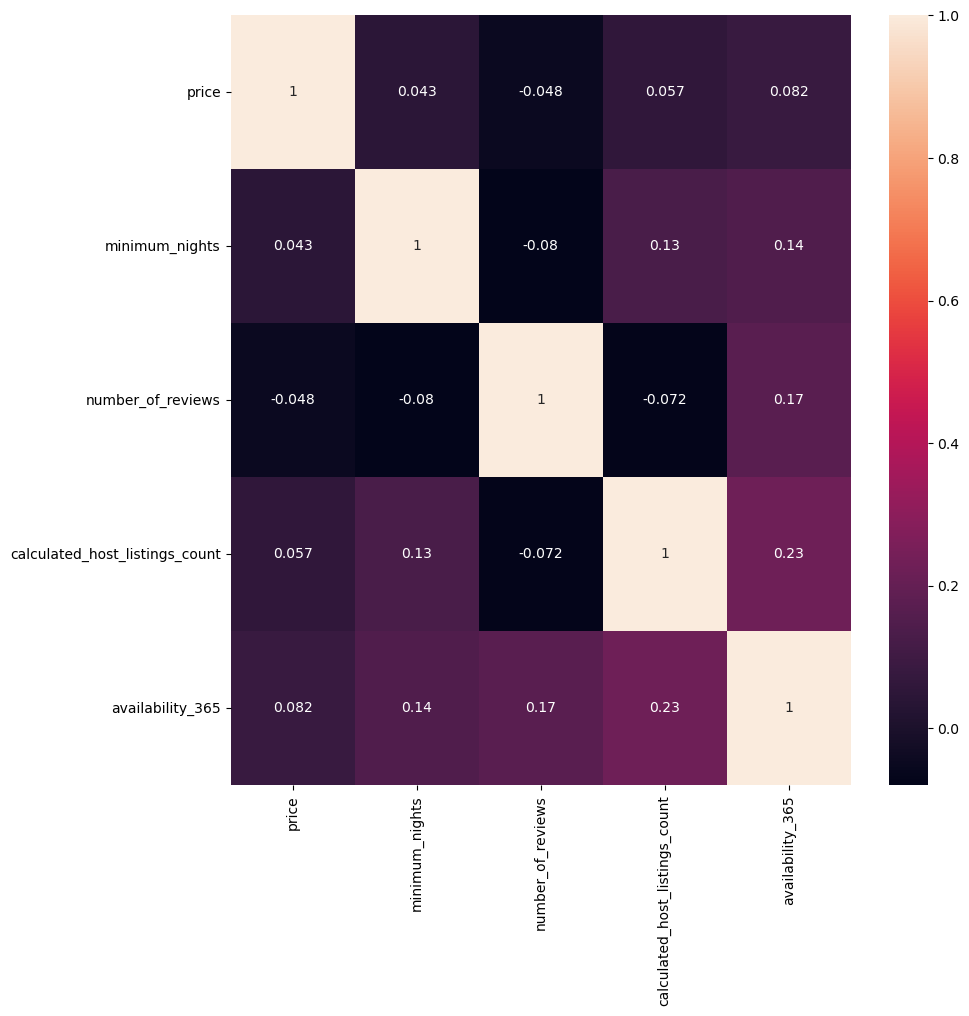

In [15]:
# correlation matrix heatmap
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df.corr(), annot = True, ax = ax)

##### no or weak correlation only was detected. Further analysis needed

In [16]:
# import heatmap
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'corr_hearmap.png'))

### 6.2.4 Scatterplots

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


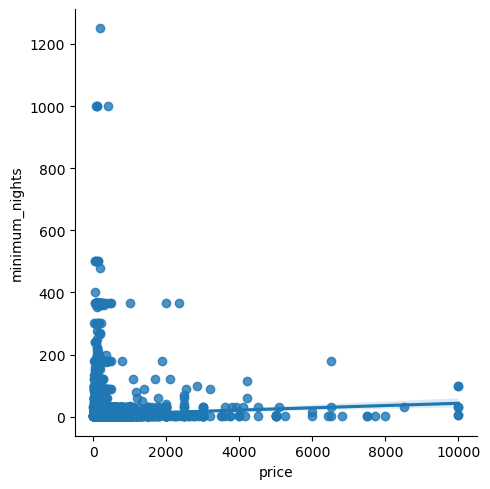

In [17]:
# minimum nights 
scatter_price_min_nights = sns.lmplot(x = 'price', y = 'minimum_nights', data = df)

##### no visible pattern but: demanding high price no high minimum nights amount can be set

In [18]:
# export 
scatter_price_min_nights.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_price_min_nights.png'))

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


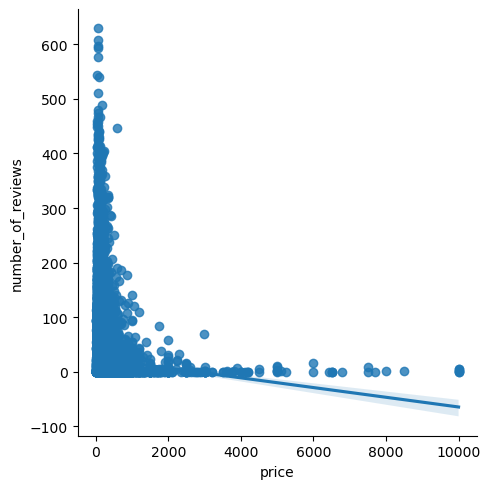

In [19]:
# number of reviews
scatter_price_number_of_reviews = sns.lmplot(x = 'price', y = 'number_of_reviews', data = df)

##### no dependancy detected

In [20]:
# export 
scatter_price_number_of_reviews.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_price_number_of_reviews.png'))

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


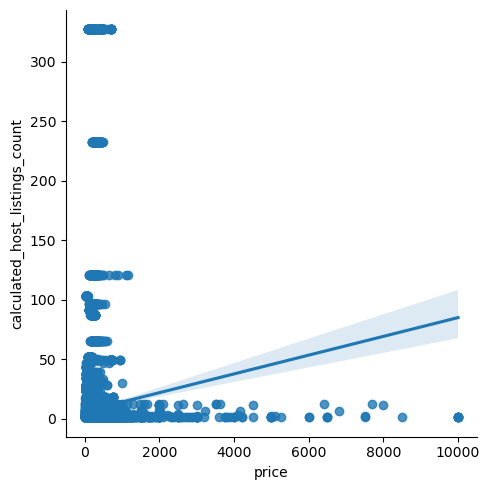

In [21]:
#  calculated_host_listings_count
scatter_price_calculated_host_listings_count = sns.lmplot(x = 'price', y = 'calculated_host_listings_count', data = df)

##### weak correlation: the more apartments a host owes, the cheaper price can be offered

In [22]:
# export 
scatter_price_calculated_host_listings_count.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_price_calculated_host_listings_count.png'))

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


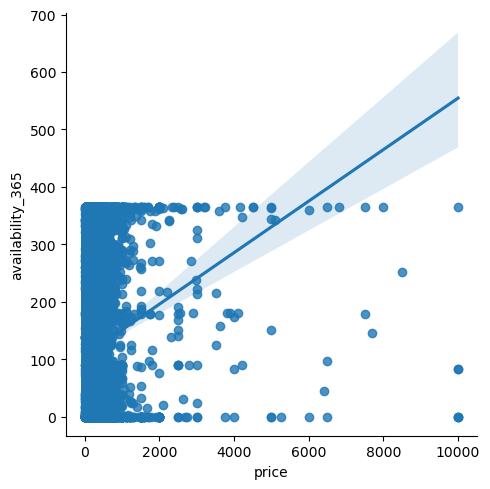

In [23]:
# availability_365
scatter_price_availability_365 = sns.lmplot(x = 'price', y = 'availability_365', data = df)

##### slight tendency to demand higher price for availability

In [24]:
# export 
scatter_price_availability_365.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_price_availability_365.png'))

### 6.2.5 Pair plot

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

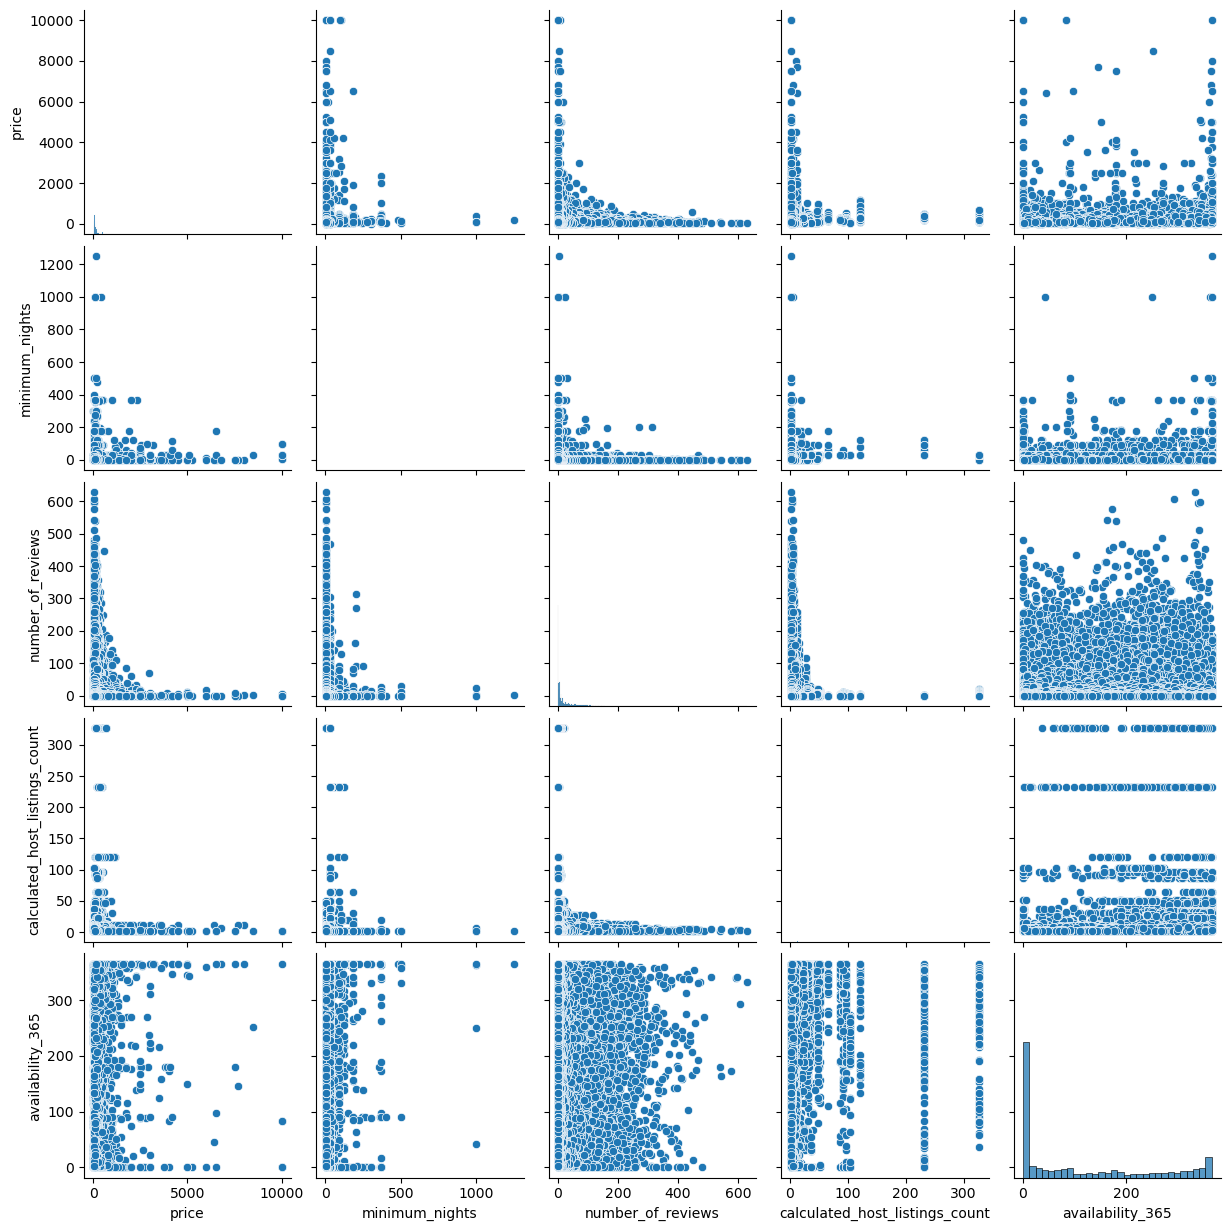

In [25]:
pairplot = sns.pairplot(df)

##### Other variables need to be taken into account as from this plots no clear dependencies can be derived. I believe location and type of apartment will perform better

In [26]:
# export 
pairplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'))

### 6.2.6 Categorical plot

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

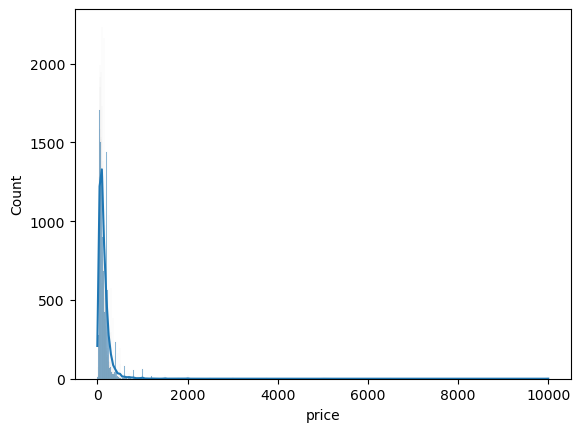

In [35]:
# price distribution
sns.histplot(df['price'], bins = 2000, kde = True)

##### histogram (experimenting with different bins sizes) doesn't deliver suitable visualization to decide on price categories. It was decided to use the describe instead

In [38]:
df.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327
std,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


##### 4 price categories would make perfect sence here: <70, 70-106, 106-175, >175

In [40]:
df.loc[df['price'] < 70, 'Price category'] = 'Low price'

In [41]:
df.loc[(df['price'] >= 70) & (df['price'] < 106), 'Price category'] = 'Middle price'

In [42]:
df.loc[(df['price'] >= 106) & (df['price'] < 175), 'Price category'] = 'High price'

In [43]:
df.loc[df['price'] >= 175 , 'Price category'] = 'Very high price'

In [44]:
# check
df.head(3)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Price category
0,149,1,9,6,365,High price
1,225,1,45,2,355,Very high price
2,150,3,0,1,365,High price


In [45]:
# check numbers for category
df['Price category'].value_counts(dropna = False)

Price category
Very high price    12940
Low price          12371
Middle price       12066
High price         11518
Name: count, dtype: int64

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

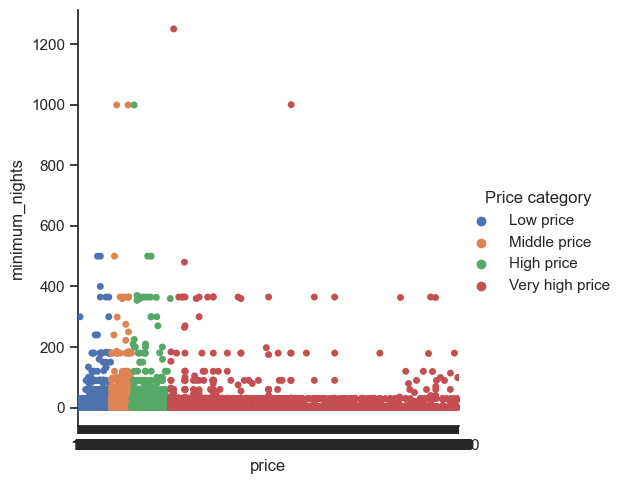

In [48]:
# categorical plot min_nights
sns.set(style="ticks")
cat_min_nights = sns.catplot(x="price", y="minimum_nights", hue="Price category", data=df)

##### Low price is presented only for apartments with max 500 of minimum nights booked. For short-term rental all price categories are well-presented.

In [49]:
# export 
cat_min_nights.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cat_min_nights.png'))

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

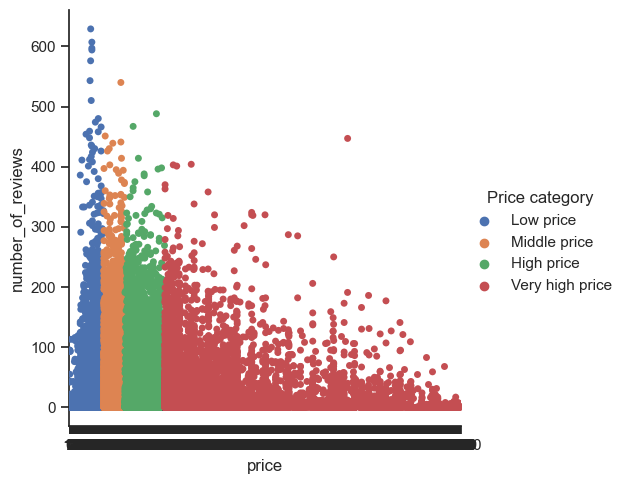

In [50]:
# categorical plot number_of_reviews
sns.set(style="ticks")
cat_number_of_reviews = sns.catplot(x="price", y="number_of_reviews", hue="Price category", data=df)

##### surprisingly the less customers pay per night, the most likely they leave the review.

In [52]:
# export 
cat_number_of_reviews.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cat_number_of_reviews.png'))

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

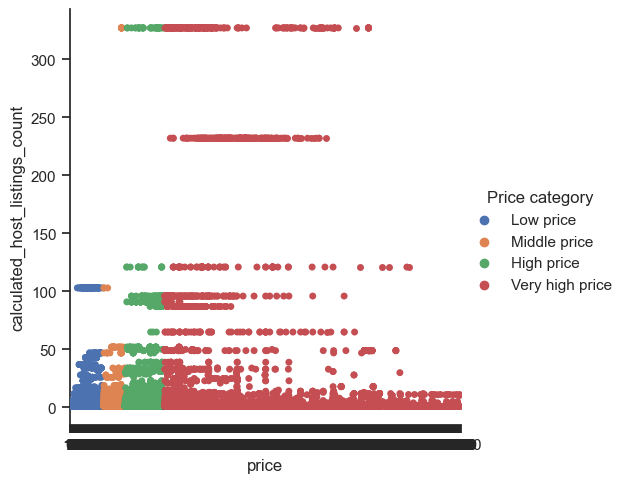

In [53]:
# categorical plot calculated_host_listings_count
sns.set(style="ticks")
cat_calculated_host_listings_count = sns.catplot(x="price", y="calculated_host_listings_count", hue="Price category", data=df)

##### interestingly hosts with lots of apartments on the platform offer apartments in higher price ranges. 

In [54]:
# export 
cat_calculated_host_listings_count.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cat_calculated_host_listings_count.png'))

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

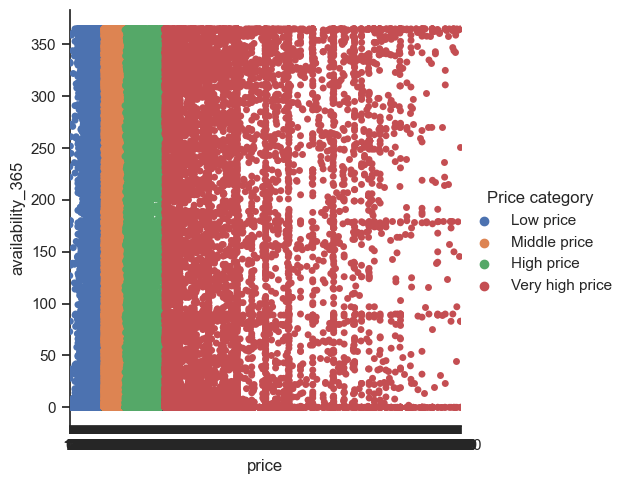

In [55]:
# categorical plot availability_365
sns.set(style="ticks")
cat_availability_365 = sns.catplot(x="price", y="availability_365", hue="Price category", data=df)

##### no difference identified

In [56]:
# export 
cat_availability_365.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cat_availability_365.png'))

### 6.2.7 Questions revisions

##### ● Where in NYC the most apartments for rent are situated and what is the price distribution? --> to be explored later
##### ● Which factors other than location influence the price? --> host listing count
##### ● Are there apartment profiles? --> one profile created: price categories
##### ● Who are the top Air bnb hosts in NYC? --> not yet


### 6.2.8 Hypotheses

##### It is to believe that spatial analysis will deliver more insights and a hypothesis can be created.
##### Based on findings from this exercise hypothesis could be:
##### --> if a host offers more than 110 apartments the price will be more than 106.